#  HOUSING PRICES REGRESSION ANALYSIS

***Importing the necessary libraries***
-  

In [237]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import dabl
import warnings
import statsmodels.api as sm


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')


In [238]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [239]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [240]:
corr_var = df[["YearBuilt", "Neighborhood","OverallQual", "YearRemodAdd", "1stFlrSF", 
               "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF", "SalePrice" ]]
corr_var.head()

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,2003,CollgCr,7,2003,856,1710,2,8,2,548,856,208500
1,1976,Veenker,6,1976,1262,1262,2,6,2,460,1262,181500
2,2001,CollgCr,7,2002,920,1786,2,6,2,608,920,223500
3,1915,Crawfor,7,1970,961,1717,1,7,3,642,756,140000
4,2000,NoRidge,8,2000,1145,2198,2,9,3,836,1145,250000


In [241]:
corr_var.isnull().sum()

YearBuilt       0
Neighborhood    0
OverallQual     0
YearRemodAdd    0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

<Figure size 504x720 with 0 Axes>

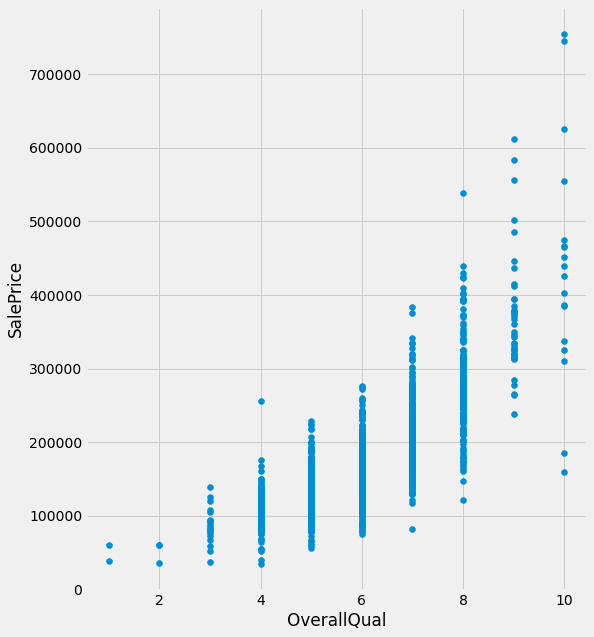

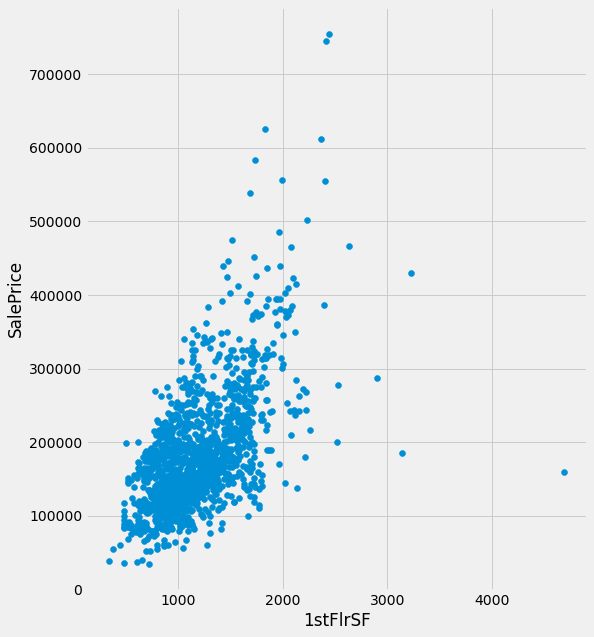

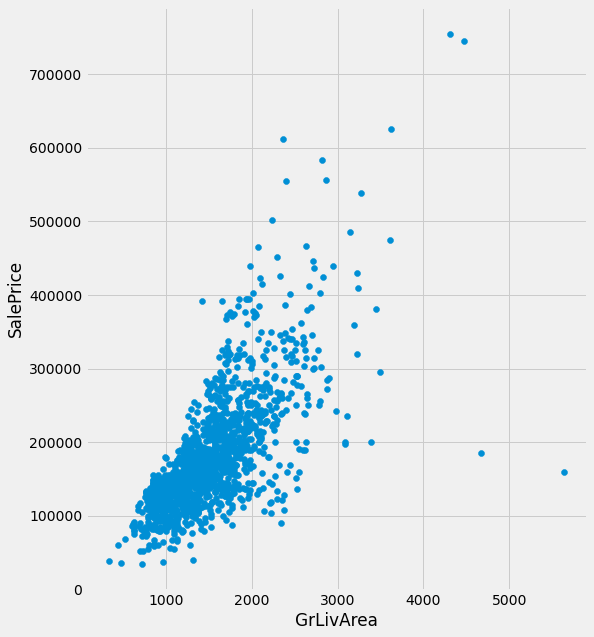

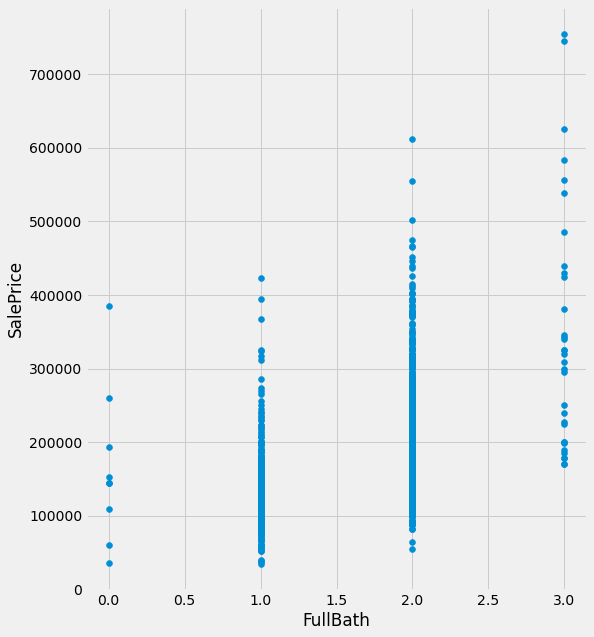

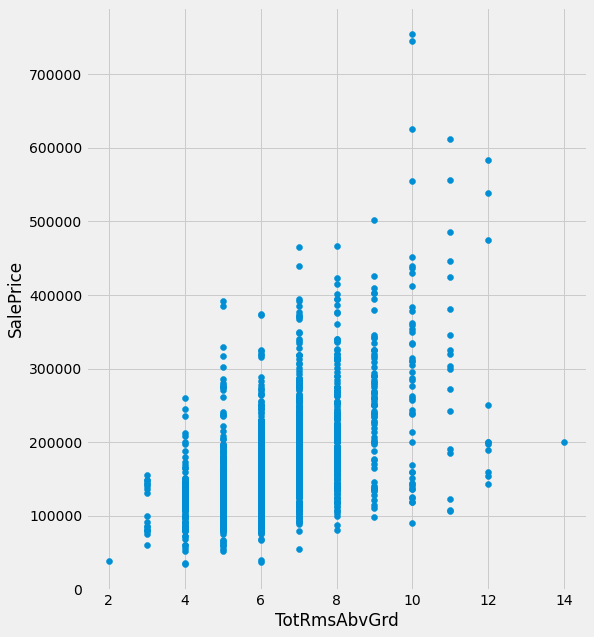

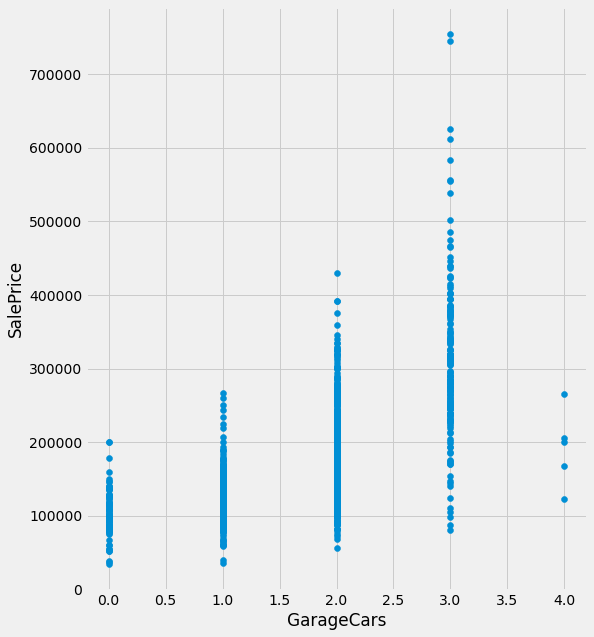

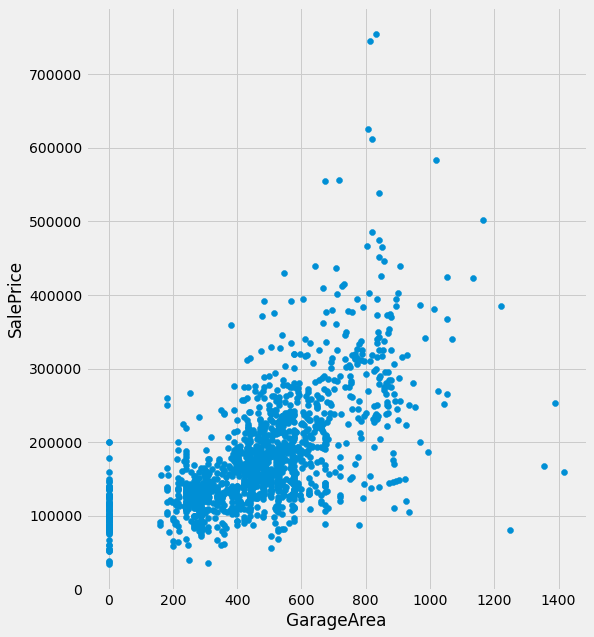

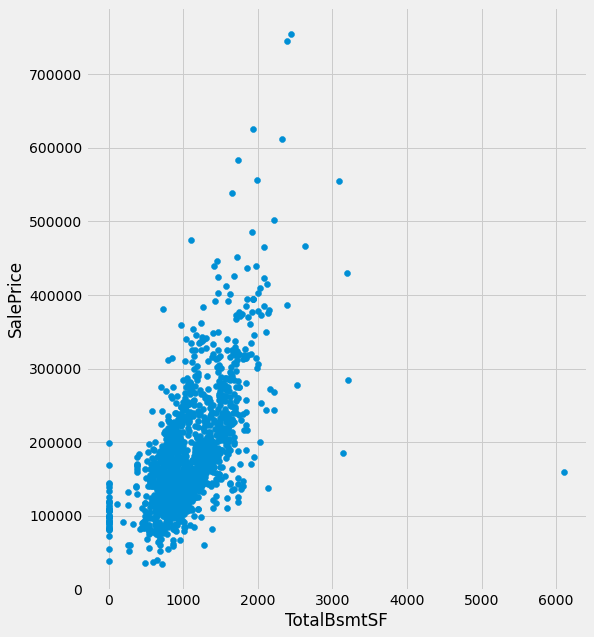

In [242]:
plt.figure(figsize=(7,10))
variables = ["OverallQual", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF"]
Target_variable = corr_var["SalePrice"]


for v in variables:
    plt.figure(figsize=(8,10))
    plt.scatter(corr_var[v], Target_variable)
    plt.xlabel(v)
    plt.ylabel("SalePrice")
    plt.show()


In [243]:
corr_var.loc[corr_var["1stFlrSF"] > 4000]

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
1298,2008,Edwards,10,2008,4692,5642,2,12,2,1418,6110,160000


In [244]:
corr_var.loc[corr_var["GrLivArea"] > 4500]

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
523,2007,Edwards,10,2008,3138,4676,3,11,3,884,3138,184750
1298,2008,Edwards,10,2008,4692,5642,2,12,2,1418,6110,160000


In [245]:
corr_var.loc[corr_var["TotRmsAbvGrd"] == 14]

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
635,1914,SWISU,6,1995,1440,3395,2,14,0,0,1440,200000


In [246]:
corr_var.loc[corr_var["GarageArea"] > 1200]

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
581,2008,NridgHt,8,2009,2042,2042,2,8,3,1390,2042,253293
825,2007,NridgHt,10,2008,2084,2084,2,7,3,1220,2078,385000
1061,1935,IDOTRR,3,1950,894,894,1,6,3,1248,894,81000
1190,1961,Mitchel,4,1975,1622,1622,1,7,4,1356,1249,168000
1298,2008,Edwards,10,2008,4692,5642,2,12,2,1418,6110,160000


In [247]:
corr_var.loc[corr_var["TotalBsmtSF"] > 6000]

,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
1298,2008,Edwards,10,2008,4692,5642,2,12,2,1418,6110,160000


In [135]:
#corr_var["TotRmsAbvGrd"].plot(kind="box")

In [136]:
#corr_var["GrLivArea"].plot(kind="box")

In [248]:
corr_var = corr_var.drop(index=[523, 635, 1298, 581, 825, 1061, 1190, 1298])

<Figure size 504x720 with 0 Axes>

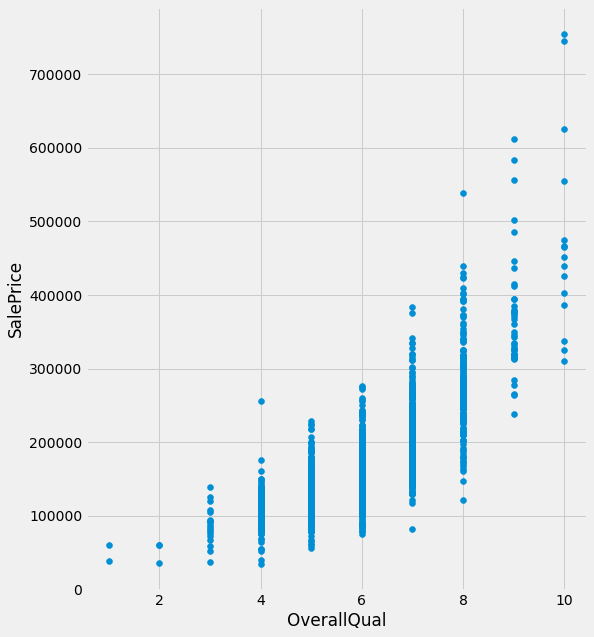

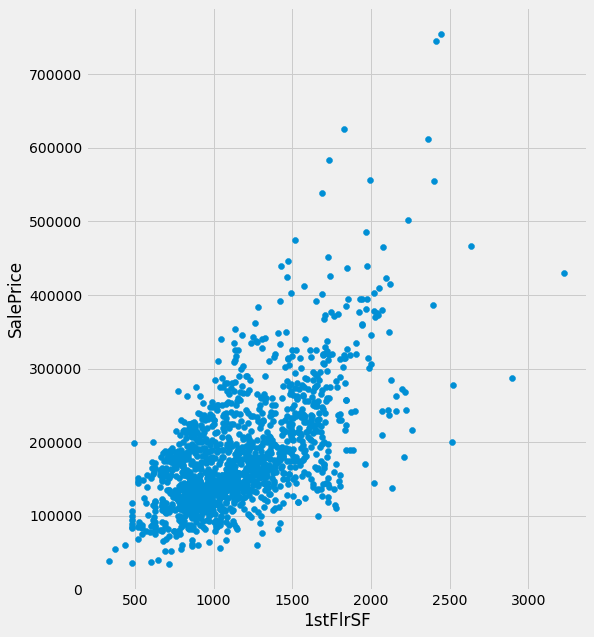

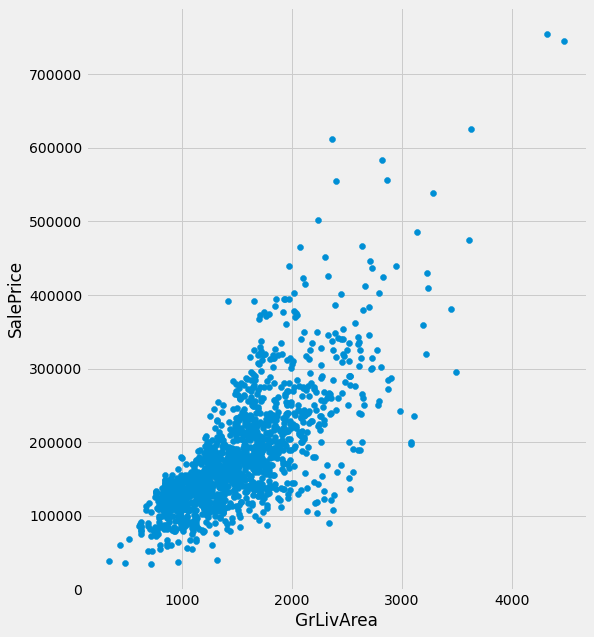

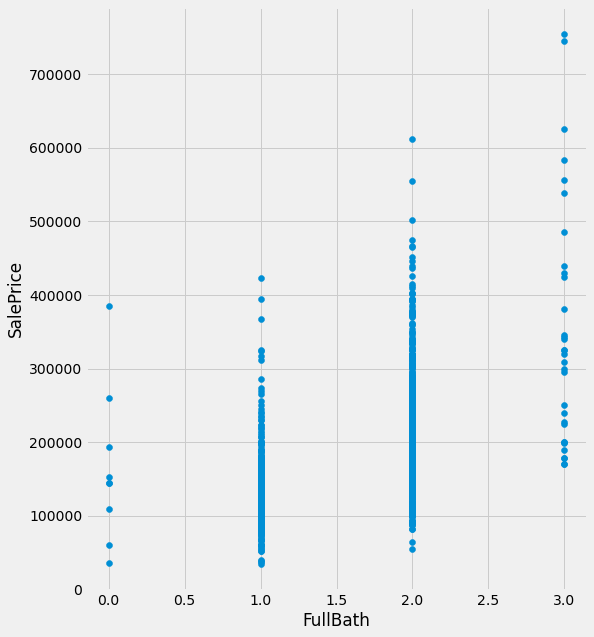

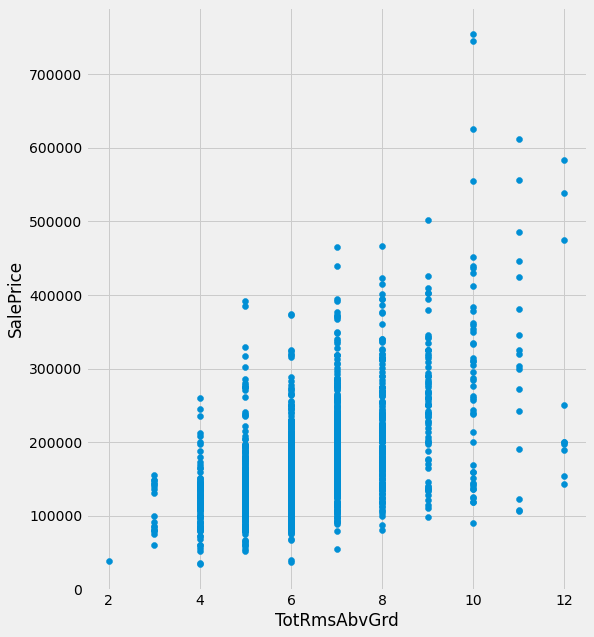

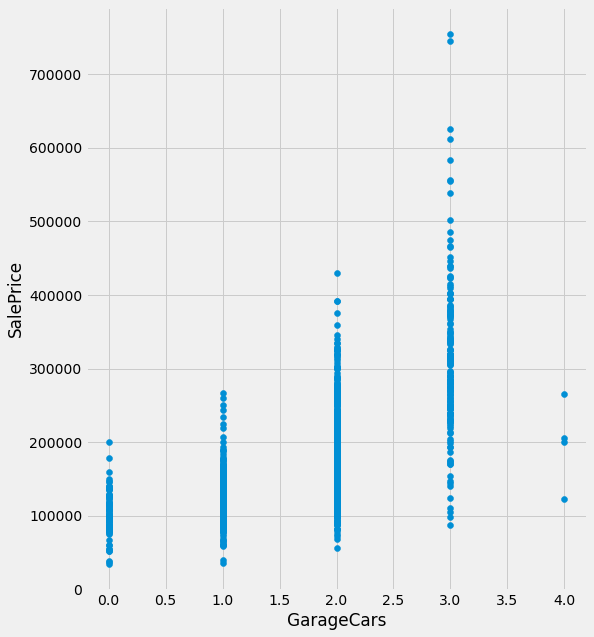

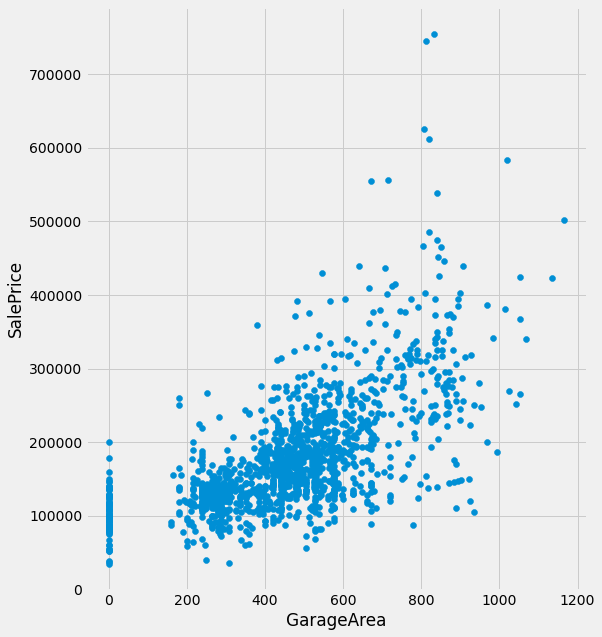

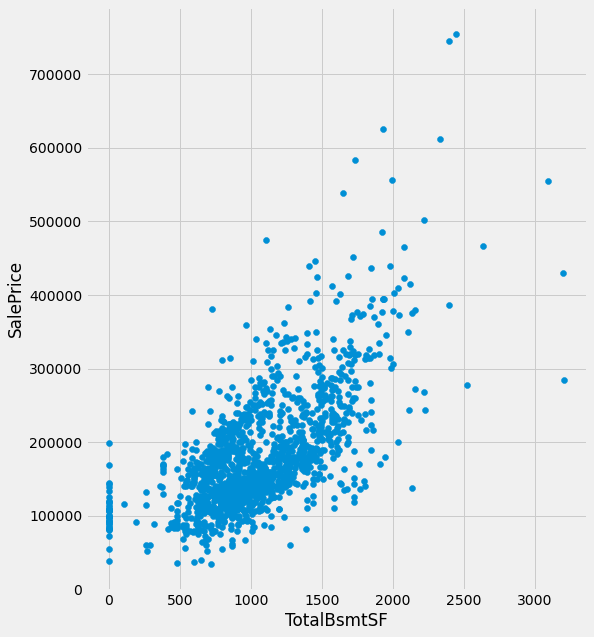

In [249]:
plt.figure(figsize=(7,10))
variables = ["OverallQual", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "TotalBsmtSF"]
Target_variable = corr_var["SalePrice"]


for v in variables:
    plt.figure(figsize=(8,10))
    plt.scatter(corr_var[v], Target_variable)
    plt.xlabel(v)
    plt.ylabel("SalePrice")
    plt.show()

In [250]:
corr_var = sm.add_constant(corr_var)

In [251]:
corr_var.head()

,const,YearBuilt,Neighborhood,OverallQual,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,1.0,2003,CollgCr,7,2003,856,1710,2,8,2,548,856,208500
1,1.0,1976,Veenker,6,1976,1262,1262,2,6,2,460,1262,181500
2,1.0,2001,CollgCr,7,2002,920,1786,2,6,2,608,920,223500
3,1.0,1915,Crawfor,7,1970,961,1717,1,7,3,642,756,140000
4,1.0,2000,NoRidge,8,2000,1145,2198,2,9,3,836,1145,250000


In [252]:
y = corr_var["SalePrice"]
X = corr_var[["const", "GrLivArea", "TotalBsmtSF", 'OverallQual', "1stFlrSF", "GarageArea", "TotalBsmtSF"]]
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:13:20   Log-Likelihood:                -17266.
No. Observations:                1453   AIC:                         3.454e+04
Df Residuals:                    1447   BIC:                         3.458e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.111e+05   4483.003    -24.774      0.000    -1.2e+05   -1.02e+05
GrLivArea      53.3559      2.500     21.342      0.000      48.452      58.260
TotalBsmtSF    20.4156      2.012     10.149      0.000      16.470      24.362
OverallQual  2.211e+04    973.404     22.716      0.000    2.02e+04     2.4e+04
1stFlrSF        6.4226      4.567      1.406      0.160      -2.535      15.381
GarageArea     55.9118      5.702      9.806      0.000      44.727      67.097
TotalBsmtSF    20.4156      2.012     10.149      0.000      16.470      24.362
==============================================================================
Omnibus:                      426.434   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3815.981
Skew:                           1.103   Prob(JB):                         0.00
Kurtosis:                      10.627   Cond. No.                     1.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.74e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [253]:
y = corr_var[["SalePrice"]]
X = corr_var[["GrLivArea", "TotalBsmtSF", 'OverallQual', "1stFlrSF", "GarageArea", "TotalBsmtSF"]]

In [254]:
regressor = LinearRegression()
regressor.fit(X, y)
regressor.score(X, y)

0.805139122004927

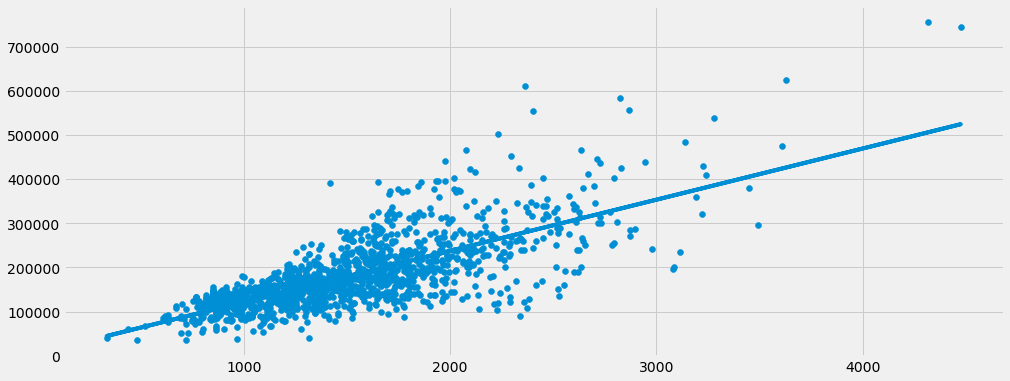

0.5438504608255761

In [265]:
x = corr_var[["GrLivArea"]] 
y = corr_var[["SalePrice"]]
reg = LinearRegression()
reg.fit(x, y)
plt.scatter(x, y)
plt.plot(x, reg.predict(x))
plt.show()
reg.score(x, y)